In [1]:
import numpy as np
import pandas as pd

import skimage.io as siio
import skimage.transform as sitr

In [2]:
import matplotlib.pyplot as plt

In [3]:
def show(img, y):
    plt.imshow(img)
    plt.scatter(y[::2], y[1::2])
    plt.show()

In [4]:
gt = pd.read_csv('data/gt.csv')

In [5]:
img = siio.imread('data/images/00008.jpg')
y = gt[gt.filename == '00008.jpg'][gt.columns[1:]].values[0]

In [6]:
def flip_img(img, y):
    y_ = y.copy()
    y_[::2] = img.shape[1] - y_[::2] - 1
    return (
        img[:, ::-1],
        y_.reshape(-1, 2)[
            [3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 10, 13, 12, 11]
        ].ravel()
    )

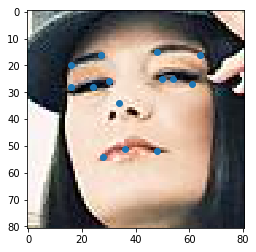

In [7]:
show(*flip_img(img, y))

In [8]:
def rotate_img(img, y):
    alpha = 20 * (np.random.rand() - 0.5)
    alpha_rad = np.radians(alpha)
    rot_mat = np.array([[np.cos(alpha_rad), -np.sin(alpha_rad)],
                        [np.sin(alpha_rad), np.cos(alpha_rad)]])
    bias = img.shape[0] / 2
    return sitr.rotate(img, alpha), (y - bias).reshape(-1, 2).dot(rot_mat).ravel() + bias

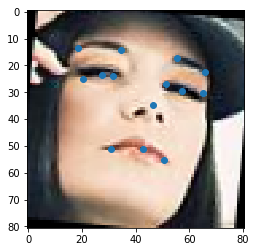

In [9]:
show(*rotate_img(img, y))

In [10]:
def cut_img(img, y):
    h = img.shape[0]
    lt = int(np.ceil(min(np.random.randint(0.05 * h, 0.15 * h), y.min())))
    rb = int(np.ceil(max(np.random.randint(0.85 * h, 0.95 * h), y.max())))
    return img[lt: rb, lt: rb], y - lt

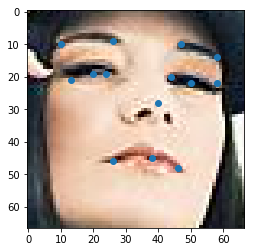

In [11]:
show(*cut_img(img, y))